#  <span style="font-family: Latin Modern Roman; font-size: 25px;"> Práctica 2B </span>
#  <span style="font-family: Latin Modern Roman; font-size: 35px; font-weight: bold;"> WebRTC P2P</span>

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> Trickle ICE </span>

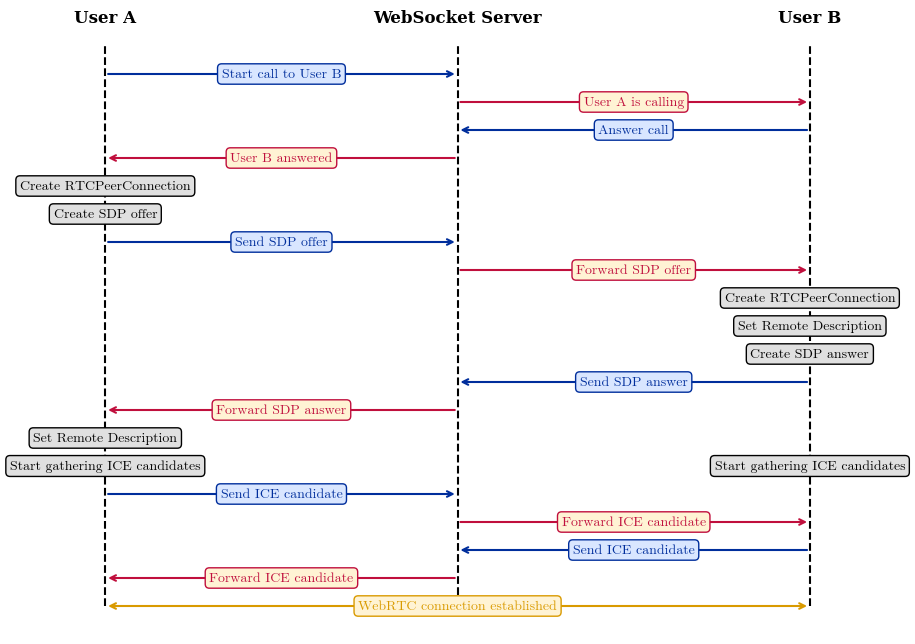

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path_regular = '/Users/sergiocuencanunez/Library/Fonts/lmroman10-regular.otf'
font_path_bold = '/Users/sergiocuencanunez/Library/Fonts/lmroman10-bold.otf'

font_prop_regular = fm.FontProperties(fname=font_path_regular, size=10)
font_prop_bold = fm.FontProperties(fname=font_path_bold, size=12)

request_color = "#002E9C"
response_color = "#C00F3D"
bidirectional_color = "#D99A00"

fig, ax = plt.subplots(figsize=(10, 8))

# Define positions for the entities
entities = ['User A', 'WebSocket Server', 'User B']
positions = [0.1, 0.5, 0.9]  # X positions for the entities

# Labels and vertical lines for each entity
for pos, entity in zip(positions, entities):
    ax.text(pos, 1.05, entity, ha='center', va='center', fontsize=12, fontweight='bold', family='serif')
    ax.plot([pos, pos], [0, 1], 'k--')

# Define messages with (start_entity, end_entity, Y position, description, type)
messages = [
    # Initial call setup
    ('User A', 'WebSocket Server', 0.95, 'Start call to User B', 'request'),
    ('WebSocket Server', 'User B', 0.9, 'User A is calling', 'response'),
    ('User B', 'WebSocket Server', 0.85, 'Answer call', 'request'),
    ('WebSocket Server', 'User A', 0.8, 'User B answered', 'response'),

    # User A creates RTCPeerConnection and SDP offer
    ('User A', 'User A', 0.75, 'Create RTCPeerConnection', 'internal'),
    ('User A', 'User A', 0.7, 'Create SDP offer', 'internal'),
    ('User A', 'WebSocket Server', 0.65, 'Send SDP offer', 'request'),
    ('WebSocket Server', 'User B', 0.6, 'Forward SDP offer', 'response'),

    # User B processes SDP offer and creates SDP answer
    ('User B', 'User B', 0.55, 'Create RTCPeerConnection', 'internal'),
    ('User B', 'User B', 0.5, 'Set Remote Description', 'internal'),
    ('User B', 'User B', 0.45, 'Create SDP answer', 'internal'),
    ('User B', 'WebSocket Server', 0.4, 'Send SDP answer', 'request'),
    ('WebSocket Server', 'User A', 0.35, 'Forward SDP answer', 'response'),

    # User A sets remote description (Added this step)
    ('User A', 'User A', 0.3, 'Set Remote Description', 'internal'),

    # ICE candidate exchange (Trickle ICE)
    ('User A', 'User A', 0.25, 'Start gathering ICE candidates', 'internal'),
    ('User B', 'User B', 0.25, 'Start gathering ICE candidates', 'internal'),
    ('User A', 'WebSocket Server', 0.2, 'Send ICE candidate', 'request'),
    ('WebSocket Server', 'User B', 0.15, 'Forward ICE candidate', 'response'),
    ('User B', 'WebSocket Server', 0.1, 'Send ICE candidate', 'request'),
    ('WebSocket Server', 'User A', 0.05, 'Forward ICE candidate', 'response'),

    # WebRTC connection established
    ('User A', 'User B', 0, 'WebRTC connection established', 'bidirectional'),
]

# Draw each message with customized text boxes and arrows
for start_entity, end_entity, y, desc, msg_type in messages:
    start_x = positions[entities.index(start_entity)]
    end_x = positions[entities.index(end_entity)]

    if msg_type == 'internal':
        # Draw the internal message on the entity
        ax.text(start_x, y, desc, ha='center', va='center',
                fontproperties=font_prop_regular, color='black',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor="#E0E0E0"))
    elif msg_type == 'request':
        ax.annotate('', xy=(end_x, y), xytext=(start_x, y),
                    arrowprops=dict(arrowstyle='->', color=request_color, lw=1.5))
        ax.text((start_x + end_x) / 2, y, desc, ha='center', va='center',
                fontproperties=font_prop_regular, color=request_color,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor=request_color, facecolor="#D9E6FF"))
    elif msg_type == 'response':
        ax.annotate('', xy=(end_x, y), xytext=(start_x, y),
                    arrowprops=dict(arrowstyle='->', color=response_color, lw=1.5))
        ax.text((start_x + end_x) / 2, y, desc, ha='center', va='center',
                fontproperties=font_prop_regular, color=response_color,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor=response_color, facecolor="#FFF3D4"))
    elif msg_type == 'bidirectional':
        ax.annotate('', xy=(end_x, y), xytext=(start_x, y),
                    arrowprops=dict(arrowstyle='<->', color=bidirectional_color, lw=1.5))
        ax.text((start_x + end_x) / 2, y, desc, ha='center', va='center',
                fontproperties=font_prop_regular, color=bidirectional_color,
                bbox=dict(boxstyle="round,pad=0.3", edgecolor=bidirectional_color, facecolor="#FFF3D4"))

# Format the plot
ax.axis('off')

# Show the diagram
plt.show()

---

## <span style="font-family: Latin Modern Roman; font-size: 25px;"> Non-Trickle ICE </span>

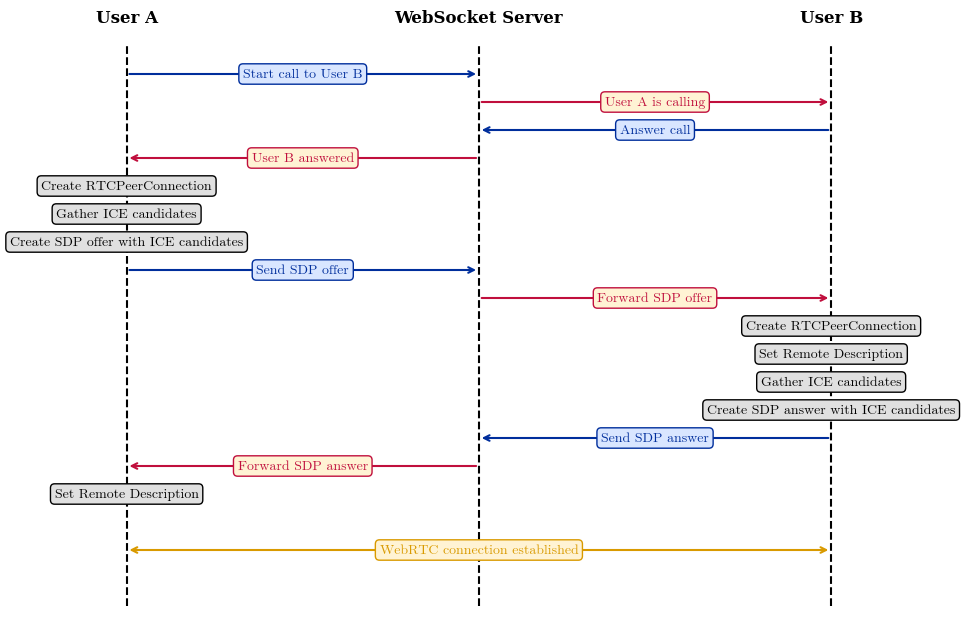

In [34]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

font_path_regular = '/Users/sergiocuencanunez/Library/Fonts/lmroman10-regular.otf'
font_path_bold = '/Users/sergiocuencanunez/Library/Fonts/lmroman10-bold.otf'

font_prop_regular = fm.FontProperties(fname=font_path_regular, size=10)
font_prop_bold = fm.FontProperties(fname=font_path_bold, size=12)

request_color = "#002E9C"
response_color = "#C00F3D"
bidirectional_color = "#D99A00"

fig, ax = plt.subplots(figsize=(10, 8))

# Define positions for the entities
entities = ['User A', 'WebSocket Server', 'User B']
positions = [0.1, 0.5, 0.9]  # X positions for the entities

# Labels and vertical lines for each entity
for pos, entity in zip(positions, entities):
    ax.text(pos, 1.05, entity, ha='center', va='center', fontsize=12, fontweight='bold', family='serif')
    ax.plot([pos, pos], [0, 1], 'k--')

# Define messages with (start_entity, end_entity, Y position, description, type)
messages = [
    # Initial call setup
    ('User A', 'WebSocket Server', 0.95, 'Start call to User B', 'request'),
    ('WebSocket Server', 'User B', 0.9, 'User A is calling', 'response'),
    ('User B', 'WebSocket Server', 0.85, 'Answer call', 'request'),
    ('WebSocket Server', 'User A', 0.8, 'User B answered', 'response'),
    
    # User A creates RTCPeerConnection and gathers ICE candidates
    ('User A', 'User A', 0.75, 'Create RTCPeerConnection', 'internal'),
    ('User A', 'User A', 0.7, 'Gather ICE candidates', 'internal'),
    ('User A', 'User A', 0.65, 'Create SDP offer with ICE candidates', 'internal'),
    ('User A', 'WebSocket Server', 0.6, 'Send SDP offer', 'request'),
    ('WebSocket Server', 'User B', 0.55, 'Forward SDP offer', 'response'),
    
    # User B processes SDP offer and gathers ICE candidates
    ('User B', 'User B', 0.5, 'Create RTCPeerConnection', 'internal'),
    ('User B', 'User B', 0.45, 'Set Remote Description', 'internal'),
    ('User B', 'User B', 0.4, 'Gather ICE candidates', 'internal'),
    ('User B', 'User B', 0.35, 'Create SDP answer with ICE candidates', 'internal'),
    ('User B', 'WebSocket Server', 0.3, 'Send SDP answer', 'request'),
    ('WebSocket Server', 'User A', 0.25, 'Forward SDP answer', 'response'),
    
    # User A sets remote description
    ('User A', 'User A', 0.2, 'Set Remote Description', 'internal'),
    
    # WebRTC connection established
    ('User A', 'User B', 0.1, 'WebRTC connection established', 'bidirectional'),
]

# Draw each message with customized text boxes and arrows
for start_entity, end_entity, y, desc, msg_type in messages:
    start_x = positions[entities.index(start_entity)]
    end_x = positions[entities.index(end_entity)]
    
    if msg_type == 'internal':
        # Draw the internal message on the entity
        ax.text(start_x, y, desc, ha='center', va='center',
                fontproperties=font_prop_regular, color='black',
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor="#E0E0E0"))
    elif msg_type == 'request':
        ax.annotate('', xy=(end_x, y), xytext=(start_x, y),
                    arrowprops=dict(arrowstyle='->', color=request_color, lw=1.5))
        ax.text((start_x + end_x) / 2, y, desc, ha='center', va='center', 
                fontproperties=font_prop_regular, color=request_color, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor=request_color, facecolor="#D9E6FF"))
    elif msg_type == 'response':
        ax.annotate('', xy=(end_x, y), xytext=(start_x, y),
                    arrowprops=dict(arrowstyle='->', color=response_color, lw=1.5))
        ax.text((start_x + end_x) / 2, y, desc, ha='center', va='center', 
                fontproperties=font_prop_regular, color=response_color, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor=response_color, facecolor="#FFF3D4"))
    elif msg_type == 'bidirectional':
        ax.annotate('', xy=(end_x, y), xytext=(start_x, y),
                    arrowprops=dict(arrowstyle='<->', color=bidirectional_color, lw=1.5))
        ax.text((start_x + end_x) / 2, y, desc, ha='center', va='center', 
                fontproperties=font_prop_regular, color=bidirectional_color, 
                bbox=dict(boxstyle="round,pad=0.3", edgecolor=bidirectional_color, facecolor="#FFF3D4"))

# Format the plot
ax.axis('off')

# Show the diagram
plt.show()